# Semantic Image Search 

In this jupyter notebook we will be building Image Semantic Search. (Heavily inspired from this github repo [Sentence Transformer](https://github.com/UKPLab/sentence-transformers/tree/master/examples/applications/image-search))

As model, we use the [OpenAI CLIP Model](https://github.com/openai/CLIP), which was trained on a large set of images and image alt texts.

The original CLIP Model only works for English, hence, we used [Multilingual Knowlegde Distillation](https://arxiv.org/abs/2004.09813) to make this model work with 50+ languages.

As a source for photos, I have used [flikr8k](https://www.kaggle.com/datasets/adityajn105/flickr8k) sample.


In [9]:
# uncomment this to install
#!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 5.3 MB 11.0 MB/s 
     |████████████████████████████████| 1.3 MB 48.7 MB/s 
     |████████████████████████████████| 163 kB 50.7 MB/s 
     |████████████████████████████████| 7.6 MB 36.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=9cc2888e751032c6450a178ce40ecb73d17702b85d71e2c86d6edc0aace6c85c
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [5]:
data_path = "image_search/Flicker_1000/"

In [ ]:
import os
os.listdir(data_path)

In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm

# Here we load the multilingual CLIP model. Note, this model can only encode text.
# If you need embeddings for images, you must load the 'clip-ViT-B-32' model
model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

C:\Users\anshu\miniconda3\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 115/115 [00:00<00:00, 22.9kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████| 1.57M/1.57M [00:00<00:00, 4.17MB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████| 5.63k/5.63k [00:00<00:00, 2.86MB/s]
Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 122/122 [00:00<00:00, 121kB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 539M/539M [00:17<00:00, 30.6MB/s]
Downloading: 100%|██████████

In [26]:
import numpy as np
import matplotlib.pyplot as plt
  
def plot_images(images, query, n_row=2, n_col=2):
    _, axs = plt.subplots(n_row, n_col, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        ax.set_title(query)
        ax.imshow(img)
    plt.show()

In [7]:
# Lets compute the image embeddings.

#For embedding images, we need the non-multilingual CLIP model
img_model = SentenceTransformer('clip-ViT-B-32')

img_names = list(glob.glob(f'{data_path}*.jpg'))
print("Images:", len(img_names))
img_emb = img_model.encode([Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)


ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


Images: 1000


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:15<00:00,  1.98s/it]


In [8]:
img_emb.shape, type(img_emb)

(torch.Size([1000, 512]), torch.Tensor)

In [29]:
# Next, we define a search function.
def search(query, k=4):
    # First, we encode the query (which can either be an image or a text string)
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    
    # Then, we use the util.semantic_search function, which computes the cosine-similarity
    # between the query embedding and all image embeddings.
    # It then returns the top_k highest ranked images, which we output
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]
    
    matched_images = []
    for hit in hits:
        matched_images.append(Image.open(img_names[hit['corpus_id']]))
        
    plot_images(matched_images, query)
    #print(matched_images)


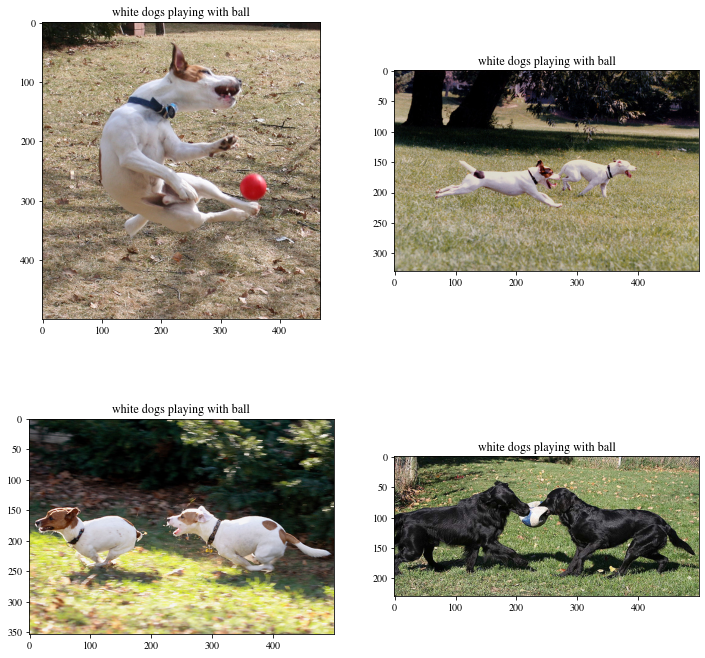

In [48]:
search("white dogs playing with ball")

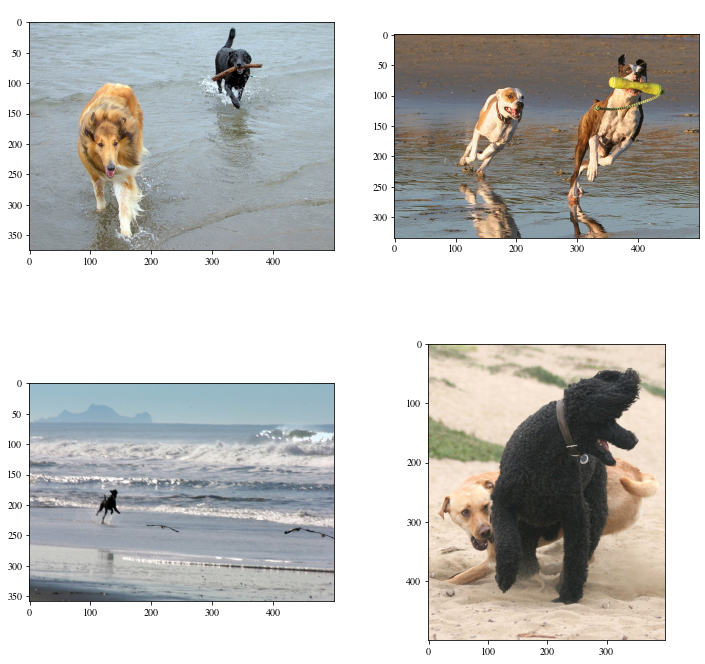

In [42]:
search("दो कुत्तों ने समुद्र किनारे खेलते")